Supplementary file 2
=================

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

from analysis import charts

plt.style.use('seaborn-white')
sns.set_context('paper')

In [2]:
named = pd.read_csv('https://zenodo.org/record/3693222/files/institutional_oa_evaluation_2020_named_unis_dataset_2020_02_12.csv?download=1')

In [3]:
## Helper functions ##

# Data cleanup required, mainly on country names #
def clean_geo_names(df):
    country_clean = { "country" : {
        "United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",
        "Iran (Islamic Republic of)" : "Iran",
        "Korea, Republic of" : "South Korea",
        "Taiwan, Province of China" : "Taiwan"
                              }
                    }
    df.replace(to_replace = country_clean, inplace=True)

    df.loc[df.country.isin(['Canada', 'United States of America']), 'region'] = 'North America'
    df.replace('Americas', 'Latin America', inplace=True)
    return df

# Creating nice column names for graphing
def nice_column_names(df):
    cols = [
        ('Open Access (%)', 'percent_oa'),
        ('Total Green OA (%)', 'percent_green'),
        ('Total Gold OA (%)', 'percent_gold'),
        ('Green in Institutional Repository (%)', 'percent_in_home_repo'),
        ('Hybrid OA (%)', 'percent_hybrid'),
        ('Total Publications', 'total'),
        ('Change in Open Access (%)', 'total_oa_pc_change'),
        ('Change in Green OA (%)', 'green_pc_change'),
        ('Change in Gold OA (%)', 'gold_pc_change'),
        ('Change in Total Publications (%)', 'total_pc_change'),        
        ('Year of Publication', 'published_year'),
        ('University Name', 'name'),
        ('Region', 'region'),
        ('Country', 'country'),
            ]
    for col in cols:
        if col[1] in df.columns.values:
            df[col[0]] = df[col[1]]

    return df

# Function for calculating confidence intervals
def calculate_confidence_interval(df, columns,
                                  total_column='total',
                                  column_name_add='_err'):
    for column in columns:
        new_column_name = column + column_name_add
        df[new_column_name] = 100*3.43*(
                                            df[column] / 100 *
                                                   (
                                                    1 - df[column] / 100
                                                   ) /
                                            df[total_column]
                                                )**(.5)
    return df

In [4]:
# Do the data cleanup and a few calculations for graphing
clean_geo_names(named)
named = calculate_confidence_interval(named,
                                 ['percent_gold', 
                                  'percent_green', 
                                  'percent_oa'])
named = nice_column_names(named)

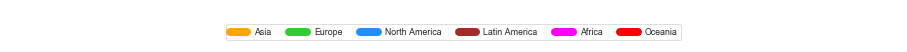

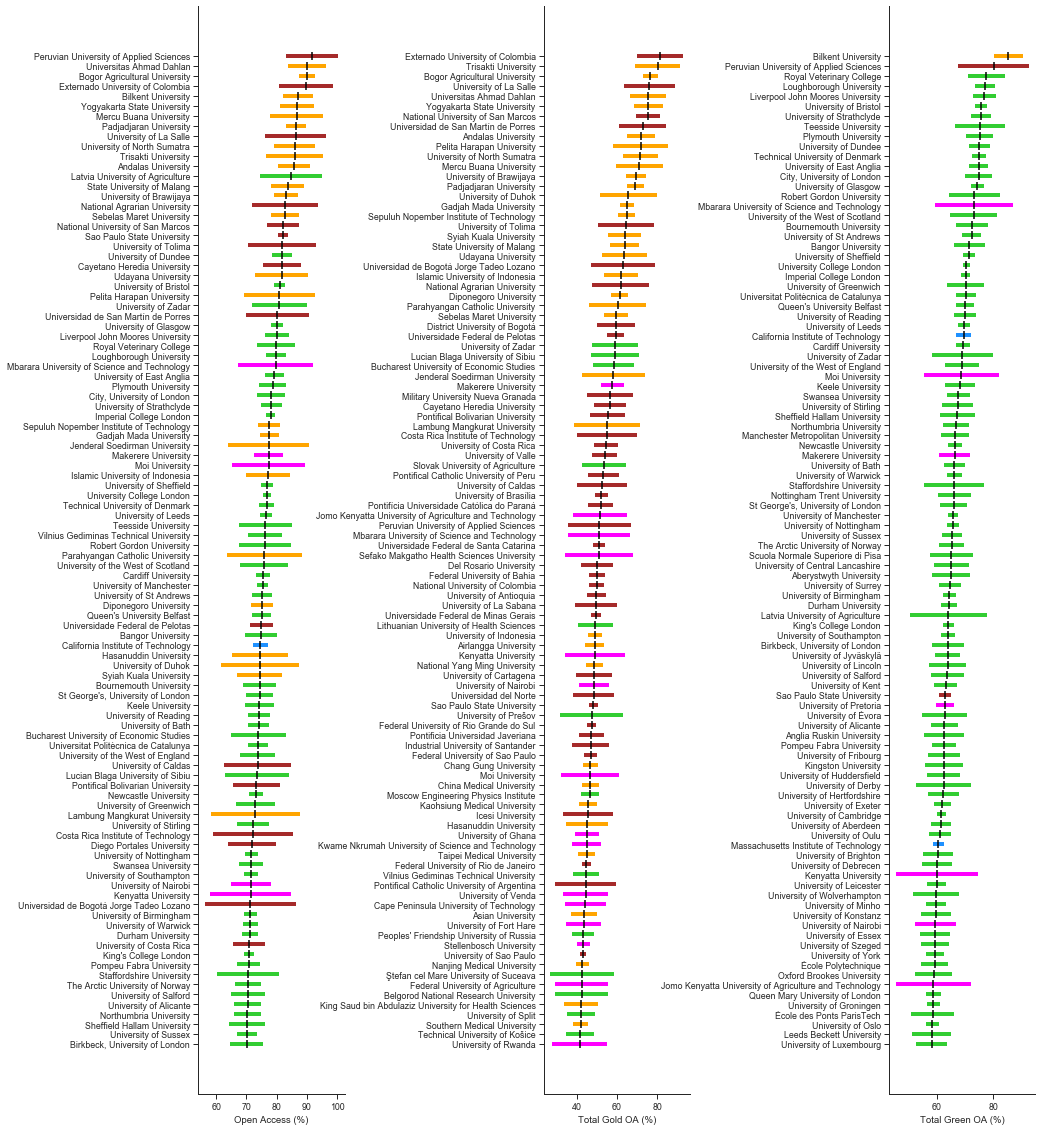

In [5]:
#from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='orange', lw=8, label='Asia'),
                   Line2D([0], [0], color='limegreen', lw=8, label='Europe'),
                   Line2D([0], [0], color='dodgerblue', lw=8, label='North America'),
                   Line2D([0], [0], color='brown', lw=8, label='Latin America'),
                   Line2D([0], [0], color='magenta', lw=8, label='Africa'),
                   Line2D([0], [0], color='red', lw=8, label='Oceania')]
# Create the figure
fig, ax = plt.subplots(figsize=(16,0.7))
ax.legend(handles=legend_elements, loc='lower center', frameon=True, ncol=6)
plt.axis('off')
plt.show()
params = [
            {
            'chart_class': charts.ConfidenceIntervalRank,
            'rankcol': 'Open Access (%)',
            'errorcol': 'percent_oa_err',
            'filter_name': 'published_year',
            'filter_value': 2017
            },
            {
            'chart_class': charts.ConfidenceIntervalRank,
            'rankcol': 'Total Gold OA (%)',
            'errorcol': 'percent_gold_err',
            'filter_name': 'published_year',
            'filter_value': 2017
            },
            {
            'chart_class': charts.ConfidenceIntervalRank,
            'rankcol': 'Total Green OA (%)',
            'errorcol': 'percent_green_err',
            'filter_name': 'published_year',
            'filter_value': 2017
            }
]
figdata = named[(named.percent_green_err<17)&
                              (named.total*named.percent_green/100>5)&
                              ((named.total*(1-named.percent_green/100)>5))&
                              (named.percent_gold_err<17)&
                              (named.total*named.percent_gold/100>5)&
                              ((named.total*(1-named.percent_gold/100)>5))&
                              (named.percent_oa_err<17)&
                              (named.total*named.percent_oa/100>5)&
                              ((named.total*(1-named.percent_oa/100)>5))]
figure = charts.Layout(figdata, params)
figure.process_data()
figure.plot(wspace=1.36);